# 2클래스 데이터를 다중분류
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비

In [2]:
!wget https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

--2023-01-09 02:52:05--  https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2023-01-09 02:52:06 (81.1 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [3]:
diabetes = pd.read_csv("/content/diabetes.csv")

In [4]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df = diabetes

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.columns = [x.lower() for x in df.columns]

In [9]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [10]:
x = df.drop('outcome', axis = 1)
y = df['outcome']

In [11]:
x.shape, y.shape

((768, 8), (768,))

In [12]:
x

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64

In [14]:
y.reset_index()

,index,outcome
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
763,763,0
764,764,0
765,765,0
766,766,1


In [15]:
y.unique()

array([1, 0])

In [16]:
y.value_counts()

0    500
1    268
Name: outcome, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [18]:
from sklearn.preprocessing import StandardScaler
# 데이터프레임의 대부분은 정규분포를 따르기에 standardscaler, 정규화를 시킨다.
# from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = StandardScaler()

In [20]:
x_train_s = scaler.fit_transform(x_train)

In [21]:
type(x_train_s)

numpy.ndarray

In [22]:
x_train_s[:5]
# head를 보고싶은데 넘파이배열이기 때문에 슬라이싱을 이용하여 데이터를 확인한다.

array([[ 0.06988265,  2.14755839,  2.10871776,  0.67204448, -0.70103712,
        -0.46458611,  0.60045041,  0.34941706],
       [-0.53022849, -0.86359035, -0.26309636,  0.73487916,  0.68509324,
         0.76826535,  0.58228513, -0.86661089],
       [ 0.97004936,  0.48515336,  1.07749423, -1.27583045, -0.70103712,
        -0.28290274, -0.82249685,  1.47858587],
       [ 0.97004936,  0.92427921, -0.15997401,  1.36322591,  2.26181652,
         0.34001168,  0.71549721,  0.78371276],
       [-0.53022849, -0.67539355, -0.88183048, -0.33331032,  0.11331446,
        -0.97070408,  0.47026587, -1.04032917]])

In [23]:
x_test_s = scaler.transform(x_test)

In [24]:
x_train_s.shape, x_test_s.shape

((614, 8), (154, 8))

In [25]:
y_train = y_train.values

In [26]:
y_test = y_test.values

### 모델

In [27]:
def build_model_1():
  model = keras.Sequential([
      layers.Dense(32, activation = 'relu', input_shape=(8,)),
      layers.Dense(8, activation = 'relu'),
      layers.Dense(1, activation = 'sigmoid')
  ])
  # input_shape 대신에 input_dim을 사용할 수 있다.
  # input_shape에 넣는 파라미터값은 여기서는 x_train.shape을 했을 때, 614,8의 2차원 값이지만,
  # 결과값을 가지고 추출하기 위해서 8만 사용한다. 1차원 데이터
  # 파라미터의 값을 넣을때, 1차원이지만, 튜플형식에 의해서 (8,)라고 표현.

  model.compile(
      optimizer = 'adam',
      loss = 'binary_crossentropy',
      metrics = ['acc']
  )

  return model

In [28]:
model = build_model_1()
model.summary()
# 마지막 출력값이 하나일경우는 2진분류이거나, 회귀일경우(회귀는 예측수치값이기 때문).
# 마지막 출력값이 여러개일 경우, 다중분류이다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [29]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(x_train_s, y_train,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_split = 0.2,
                verbose = 1)
# validation의 값이 정해지지 않았기 때문에,
# validation_split을 통해서 val의 값을 배분하여준다.
# validation의 값이 있을 경우, validation_data를 통해 (x_val, y_val)의 파라미터를 함수와 함께 주어준다.

Epoch 1/30
16/16 [==============================] - 3s 16ms/step - loss: 0.6513 - acc: 0.6701 - val_loss: 0.6180 - val_acc: 0.6911
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6023 - acc: 0.6986 - val_loss: 0.5684 - val_acc: 0.7154
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5696 - acc: 0.7312 - val_loss: 0.5359 - val_acc: 0.7317
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5464 - acc: 0.7434 - val_loss: 0.5178 - val_acc: 0.7480
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 0.5279 - acc: 0.7658 - val_loss: 0.5061 - val_acc: 0.7480
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5144 - acc: 0.7739 - val_loss: 0.4924 - val_acc: 0.7642
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5029 - acc: 0.7780 - val_loss: 0.4819 - val_acc: 0.7886
Epoch 8/30
16/16 [==============================] - 0s 5ms/step - loss: 0.4937 - acc: 0.7

In [30]:
model.evaluate(x_train_s, y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.4367 - acc: 0.8062


[0.43674197793006897, 0.8061889410018921]

In [31]:
model.evaluate(x_test_s, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4636 - acc: 0.7338


[0.46357691287994385, 0.7337662577629089]

In [32]:
# 예측

y_pred = model.predict(x_test_s)
y_pred[:5]
# 넘파이 배열이기 때문에 슬라이싱 이용

5/5 [==============================] - 0s 2ms/step


array([[0.90066016],
       [0.35687268],
       [0.7047076 ],
       [0.05026502],
       [0.20885326]], dtype=float32)

In [33]:
# 위에서 y_pred 확인값이 2차원이기 때문에 1차원으로 펴준다.
# y_pred = y_pred.reshape(-1)
y_pred = y_pred.flatten()

In [34]:
y_pred = (y_pred > 0.5).astype('int')

### 다중분류로
- 2진분류 문제를 다중분류로 푼다, 원핫인코딩시킴.

In [35]:
y_train[:5]

array([0, 1, 0, 0, 0])

In [36]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

In [37]:
y_train_oh.shape

(614, 2)

In [38]:
x_train_s.shape

(614, 8)

In [39]:
def build_model_2():
  model = keras.Sequential([
      layers.Dense(32, activation = 'relu', input_shape=(8,)),
      layers.Dense(8, activation = 'relu'),
      layers.Dense(2, activation = 'softmax')
  ])
  # input_shape 대신에 input_dim을 사용할 수 있다.
  # input_shape에 넣는 파라미터값은 여기서는 x_train.shape을 했을 때, 614,8의 2차원 값이지만,
  # 결과값을 가지고 추출하기 위해서 8만 사용한다. 1차원 데이터
  # 파라미터의 값을 넣을때, 1차원이지만, 튜플형식에 의해서 (8,)라고 표현.

  model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics = ['acc']
  )

  return model

In [40]:
model = build_model_2()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                288       
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 570
Trainable params: 570
Non-trainable params: 0
_________________________________________________________________


In [41]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(x_train_s, y_train_oh,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_split = 0.2,
                verbose = 1)

Epoch 1/30
16/16 [==============================] - 1s 12ms/step - loss: 0.7438 - acc: 0.5356 - val_loss: 0.6722 - val_acc: 0.5854
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6719 - acc: 0.6395 - val_loss: 0.6305 - val_acc: 0.6585
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6325 - acc: 0.6701 - val_loss: 0.6043 - val_acc: 0.6504
Epoch 4/30
16/16 [==============================] - 0s 5ms/step - loss: 0.6068 - acc: 0.7210 - val_loss: 0.5835 - val_acc: 0.6748
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 0.5840 - acc: 0.7393 - val_loss: 0.5642 - val_acc: 0.6748
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5643 - acc: 0.7536 - val_loss: 0.5456 - val_acc: 0.6667
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5457 - acc: 0.7658 - val_loss: 0.5299 - val_acc: 0.6585
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5301 - acc: 0.7

In [42]:
model.evaluate(x_train_s, y_train_oh)

20/20 [==============================] - 0s 2ms/step - loss: 0.4258 - acc: 0.7964


[0.4258427321910858, 0.7964169383049011]

In [43]:
model.evaluate(x_test_s, y_test_oh)

5/5 [==============================] - 0s 2ms/step - loss: 0.4696 - acc: 0.7403


[0.4696125090122223, 0.7402597665786743]

In [44]:
y_pred = model.predict(x_test_s)

5/5 [==============================] - 0s 2ms/step


In [45]:
y_pred

array([[7.00884461e-02, 9.29911494e-01],
       [7.24289298e-01, 2.75710702e-01],
       [3.56018454e-01, 6.43981576e-01],
       [9.40217257e-01, 5.97827807e-02],
       [8.47428739e-01, 1.52571231e-01],
       [6.24235868e-01, 3.75764072e-01],
       [6.16794467e-01, 3.83205503e-01],
       [8.19890201e-01, 1.80109829e-01],
       [4.87568855e-01, 5.12431204e-01],
       [7.82414675e-01, 2.17585325e-01],
       [9.32328165e-01, 6.76717758e-02],
       [5.54069877e-01, 4.45930123e-01],
       [6.63340211e-01, 3.36659849e-01],
       [4.50910389e-01, 5.49089611e-01],
       [6.02563202e-01, 3.97436827e-01],
       [3.44328493e-01, 6.55671537e-01],
       [9.13574278e-01, 8.64257514e-02],
       [3.24779272e-01, 6.75220728e-01],
       [4.24337953e-01, 5.75662076e-01],
       [9.59379613e-01, 4.06204201e-02],
       [3.63498688e-01, 6.36501372e-01],
       [9.62366164e-01, 3.76338400e-02],
       [8.45929980e-01, 1.54070005e-01],
       [5.24064898e-01, 4.75935102e-01],
       [9.669514

In [46]:
y_pred = np.argmax(y_pred, axis =1)
y_pred[:5]

array([1, 0, 1, 0, 0])

# 다중분류에서 원핫인코딩을 하지않고 학습



### 데이터 준비

In [47]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (154,)


[57341 26521 17143 25122 54600 10515 45489 18247 26529]


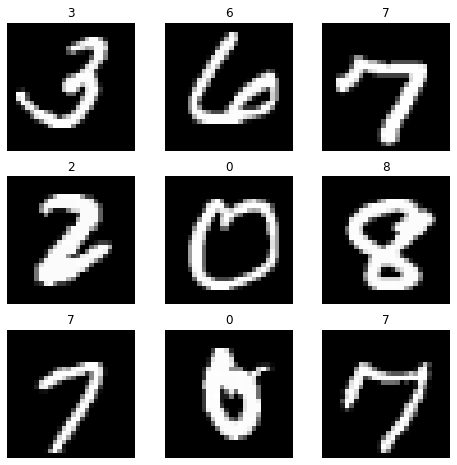

In [48]:
samples = np.random.randint(60000, size = 9)
print(samples)

plt.figure(figsize = (8,8))

for i, idx in enumerate(samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[idx], cmap = 'gray')
  plt.axis('off')
  plt.title(y_train[idx])

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, stratify = y_train)

print(x_train.shape, x_val.shape)
print(x_test.shape, y_test.shape)

(48000, 28, 28) (12000, 28, 28)
(10000, 28, 28) (154,)


In [50]:
# 정규화

# 최대최소 정규화 사용
# 이미지는 최대가 255이기 때문에 255로 나눈다.
x_train = x_train.astype('float32')/255.
x_val = x_val.astype('float32')/255.
x_test = x_test.astype('float32')/255.

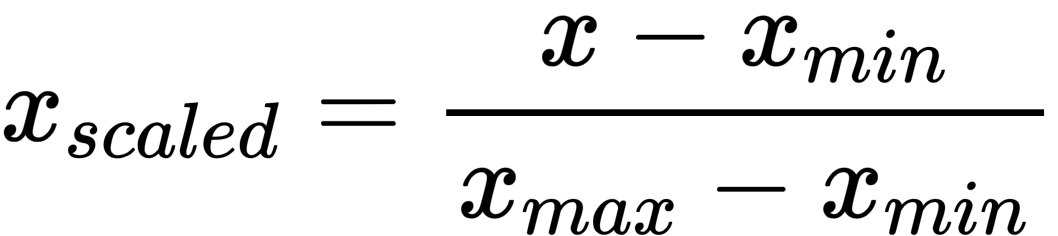

In [51]:
y_train

array([2, 5, 2, ..., 5, 7, 7], dtype=uint8)

In [52]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

y_train_oh[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [53]:
y_train_oh.shape

(48000, 10)

# 모델

In [54]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [55]:
def build_model_3():
  model = keras.Sequential([
      layers.Conv2D(32, 3, activation='relu', input_shape = (28, 28, 1)), # 32, (3, 3)이라고 적어도 됨. 32, 3하면 자동적으로 32, (3, 3)들어감.
      layers.MaxPool2D(2),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPool2D(2),
      
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])

  model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics = ['acc']
       )
  
  return model

In [56]:
model = build_model_3()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [57]:
EPOCHS = 10
BATCH_SIZE = 32

log = model.fit(x_train, y_train_oh,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (x_val, y_val_oh),
                verbose = 1
)

Epoch 1/10
1500/1500 [==============================] - 11s 3ms/step - loss: 0.1338 - acc: 0.9586 - val_loss: 0.0527 - val_acc: 0.9835
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0446 - acc: 0.9858 - val_loss: 0.0445 - val_acc: 0.9863
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0289 - acc: 0.9905 - val_loss: 0.0464 - val_acc: 0.9855
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0204 - acc: 0.9936 - val_loss: 0.0413 - val_acc: 0.9880
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0158 - acc: 0.9949 - val_loss: 0.0327 - val_acc: 0.9900
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0119 - acc: 0.9963 - val_loss: 0.0379 - val_acc: 0.9883
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0095 - acc: 0.9967 - val_loss: 0.0401 - val_acc: 0.9898
Epoch 8/10
1500/1500 [==============================] - 5s 3m

In [58]:
print(x_train.shape, y_train_oh.shape)
print(x_val.shape, y_val_oh.shape)

(48000, 28, 28, 1) (48000, 10)
(12000, 28, 28, 1) (12000, 10)


In [59]:
model.evaluate(x_train, y_train_oh)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.0047 - acc: 0.9986


[0.004739399999380112, 0.9986458420753479]

In [60]:
y_pred = model.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.4829195e-16, 1.9083825e-14, 1.1697643e-13, 2.4805583e-11,
        1.3951983e-11, 1.3631261e-14, 2.4968581e-19, 1.0000000e+00,
        8.5559374e-15, 2.5897989e-11],
       [2.6566288e-12, 2.2673458e-10, 1.0000000e+00, 4.0441059e-19,
        1.7058669e-14, 8.6204183e-21, 1.4150822e-10, 4.8677350e-14,
        1.7227313e-15, 9.7488390e-17],
       [1.7992434e-11, 1.0000000e+00, 6.3051814e-11, 5.1257525e-15,
        2.3059314e-09, 7.9873726e-11, 2.0778346e-09, 5.0851225e-09,
        6.3432049e-10, 3.8088838e-10],
       [1.0000000e+00, 6.2955036e-16, 5.7839150e-12, 5.2881338e-13,
        1.0757014e-12, 1.2896566e-14, 1.0938340e-08, 2.5612443e-10,
        5.8932666e-13, 3.6165110e-10],
       [6.9623991e-17, 6.7631100e-13, 1.3559548e-12, 1.4485893e-15,
        1.0000000e+00, 2.5951176e-16, 6.3121471e-15, 9.3749205e-13,
        4.2950178e-13, 1.2917610e-11]], dtype=float32)

In [61]:
y_pred = np.argmax(y_pred, axis = 1)

# 원핫하지않고

In [62]:
def build_model_4():
  model = keras.Sequential([
      layers.Conv2D(32, 3, activation='relu', input_shape = (28, 28, 1)), # 32, (3, 3)이라고 적어도 됨. 32, 3하면 자동적으로 32, (3, 3)들어감.
      layers.MaxPool2D(2),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPool2D(2),
      
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])

  model.compile(
      optimizer = 'adam',
      loss = 'sparse_categorical_crossentropy', # sparse_를 붙이면 y를 원핫인코딩을 하지 않아도 내부적으로 원핫인코딩을 하여 계산한다.
      metrics = ['acc']
       )
  
  return model

In [63]:
model = build_model_4()

In [64]:
EPOCHS = 10
BATCH_SIZE = 32

log = model.fit(x_train, y_train,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (x_val, y_val),
                verbose = 1
)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1317 - acc: 0.9589 - val_loss: 0.0600 - val_acc: 0.9812
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0420 - acc: 0.9870 - val_loss: 0.0389 - val_acc: 0.9877
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0283 - acc: 0.9911 - val_loss: 0.0350 - val_acc: 0.9883
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0210 - acc: 0.9932 - val_loss: 0.0532 - val_acc: 0.9828
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0149 - acc: 0.9953 - val_loss: 0.0382 - val_acc: 0.9887
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0108 - acc: 0.9966 - val_loss: 0.0421 - val_acc: 0.9891
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0097 - acc: 0.9967 - val_loss: 0.0438 - val_acc: 0.9893
Epoch 8/10
1500/1500 [==============================] - 5s 3ms

In [65]:
y_pred = model.predict(x_test)
y_pred

313/313 [==============================] - 1s 1ms/step


array([[3.22148272e-15, 9.18651899e-19, 2.22526251e-12, ...,
        1.00000000e+00, 1.94654709e-16, 1.01054332e-12],
       [2.48794652e-10, 6.56785000e-12, 1.00000000e+00, ...,
        3.17180771e-13, 3.29203678e-13, 1.93828535e-16],
       [2.76410891e-11, 9.99904871e-01, 1.03354303e-09, ...,
        9.09984374e-05, 8.01963829e-09, 1.68618168e-08],
       ...,
       [8.17082483e-24, 1.42145003e-14, 3.34897981e-16, ...,
        4.12209850e-12, 2.41551787e-12, 7.23754119e-13],
       [1.07942716e-16, 1.57550180e-16, 1.13984454e-18, ...,
        2.85320766e-20, 3.90716295e-08, 6.47577568e-15],
       [6.41128990e-12, 1.67440090e-11, 1.86060611e-09, ...,
        5.27906614e-16, 3.97137684e-10, 1.00784645e-16]], dtype=float32)

In [66]:
y_pred = np.argmax(y_pred, axis = 1)

In [67]:
model.evaluate(x_test, y_pred)

313/313 [==============================] - 1s 2ms/step - loss: 0.0043 - acc: 1.0000


[0.004340748768299818, 1.0]

### 이진분류 -> 다중분류
- sparse_categorical_crossentropy

In [85]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.shape

(768, 9)

In [86]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [87]:
x = diabetes.drop(['Outcome'], axis = 1)
y = diabetes['Outcome']

In [88]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [90]:
y_train = y_train.values
y_test = y_test.values

In [91]:
x_train.shape

(614, 8)

In [92]:
def build_model_5():
  model = keras.Sequential([
      layers.Dense(units = 64, activation = 'relu', input_shape = (8,)),
      layers.Dense(units = 32, activation = 'relu'),
      layers.Dense(units = 16, activation = 'relu'),
      layers.Dense(units = 8, activation = 'relu'),
      layers.Dense(units = 2, activation = 'softmax')
  ])

  model.compile(
      optimizer = 'adam',
      loss = 'sparse_categorical_crossentropy',
      metrics = ['acc']
  )

  return model

In [93]:
model = build_model_5()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                576       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,338
Trainable params: 3,338
Non-trainable params: 0
_________________________________________________________________


In [94]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(x_train, y_train,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_split = 0.2,
                verbose = 1)

Epoch 1/30
16/16 [==============================] - 1s 11ms/step - loss: 0.6729 - acc: 0.6640 - val_loss: 0.6618 - val_acc: 0.7317
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6322 - acc: 0.7678 - val_loss: 0.6256 - val_acc: 0.7561
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5849 - acc: 0.7760 - val_loss: 0.5727 - val_acc: 0.7398
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5284 - acc: 0.7841 - val_loss: 0.5299 - val_acc: 0.7398
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4751 - acc: 0.7963 - val_loss: 0.5038 - val_acc: 0.7154
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4513 - acc: 0.7984 - val_loss: 0.4966 - val_acc: 0.7236
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4422 - acc: 0.8045 - val_loss: 0.4961 - val_acc: 0.7236
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4315 - acc: 0.8

In [95]:
model.evaluate(x_train, y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.3283 - acc: 0.8664


[0.3282635807991028, 0.8664495348930359]

In [96]:
x_train.shape, y_train.shape

((614, 8), (614,))

In [97]:
x_test.shape, y_test.shape

((154, 8), (154,))

In [98]:
x_train[:5]

array([[ 2.15575988,  0.689494  ,  1.27092765,  0.80235735,  0.56392547,
         0.60103866, -0.645336  ,  1.47916205],
       [-0.53334375,  0.78203612, -3.3698961 , -1.25189646, -0.66579393,
        -0.56211021, -0.687607  , -0.46524142],
       [ 0.36302412, -0.26677449, -0.11144538, -1.25189646, -0.66579393,
         0.75442093, -0.6242005 ,  0.63376924],
       [ 2.45454917, -0.45185872,  0.57974113, -1.25189646, -0.66579393,
        -1.06060259, -0.99860081,  0.88738708],
       [ 0.06423483, -0.54440083, -0.40766817,  0.80235735,  0.95137131,
        -1.00947516,  1.50444643, -0.04254501]])

In [99]:
x_test.dtype

print(type(x_test.dtype),type(y_test.dtype))

<class 'numpy.dtype[float64]'> <class 'numpy.dtype[int64]'>


In [100]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.7061 - acc: 0.6753


[0.7060562372207642, 0.6753246784210205]

In [101]:
y_pred = model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [102]:
y_pred = np.argmax(y_pred, axis = 1)

In [103]:
y_pred[:5]

array([0, 0, 0, 1, 1])